In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import math

In [45]:
#######################  Funciones ################################

def fnModa(x):
    return x.mode()[0]

def fnCV(x):
    return x.std()/x.mean()

def fnDisc(x):
    if(x>=10):
        return 1
    else:
        return 0

def fnGaussiana(x_int,X):
    # estimacion de los parametros
    mu = X.mean()
    s1 = X.std()
    # obterner la gaussiana
    A = 1/(math.sqrt(2*math.pi)*s1)
    B = -0.5*((x_int-mu)/s1)**2
    # fg = A*math.exp(B) # vectorial
    fg = [A*math.exp(B[i]) for i in range(0,x_int.shape[0])]
    return fg

def fnExponencial(x_int,X):
    # estimacion de parametros
    lamda = 1/X.mean()
    # obtener la exponencial de 1P
    fe = [lamda*math.exp(-lamda*x_int[i]) for i in range(0,x_int.shape[0])]
    return fe

def fnGumbel(x_int,X):
    # estimacion de los parametros
    mu = X.mode().max()
    beta = 0.78*X.std()
    # obtener la fn gumbel
    z = [(x_int[i]-mu)/beta for i in range(0,x_int.shape[0])] # vector
    fgum = [(1/beta)*math.exp(-(z[i]+math.exp(-z[i]))) for i in range(0,x_int.shape[0])]
    return fgum

def fnRayleigh(x_int, X):
    sig = X.std()
    A = x_int/ (sig**2)
    B = (-x_int**2)/(2*sig**2)
    fr = A * np.exp(B)

    return fr

def fnDepGraph(data, axFn):
    datos = data.to_numpy()
    mCorr = np.corrcoef(datos, rowvar=False).round(decimals=1)
    colnames = data.columns.values

    dependencias = np.abs(mCorr) >= 0.3

    grafo = nx.Graph()

    #Nodos y aristas
    for i in range(len(mCorr)):
        for j in range(len(mCorr)):
            if (i != j and dependencias[i, j]):
                grafo.add_edge(colnames[i], colnames[j], weight=mCorr[i,j])

    pos = nx.circular_layout(grafo)

    #Nodos
    nx.draw_networkx_nodes(grafo, pos, ax=axFn, node_size=1000)

    #Edges
    nx.draw_networkx_edges(grafo, pos, ax=axFn, edgelist=grafo.edges)

    #Node labels
    nx.draw_networkx_labels(grafo, pos, ax=axFn, font_size=9)

    #Edge labels
    edgeLabels = nx.get_edge_attributes(grafo,"weight")
    nx.draw_networkx_edge_labels(grafo, pos, ax=axFn, edge_labels=edgeLabels)

    # ax[0].axis("off")






In [46]:
#######################  Lectura de datos ################################
dataMat = pd.read_csv("student-mat.csv",delimiter=';')
dataPor = pd.read_csv("student-por.csv",delimiter=';')

#Seleccionar variables
dfMat = dataMat.loc[:,['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences','G1','G2','G3']]
colnames = dfMat.columns.values

In [55]:
#######################  Resumen estadístico ################################

dfMatRes = dfMat.agg(["mean",fnModa,"median","var","std",fnCV,"kurt","skew"])

# Renombrar las filas
dfMatRes = dfMatRes.rename(index={"mean": "Media",
                                  "fnModa": "Moda",
                                  "median": "Mediana",
                                  "var": "Varianza",
                                  "std": "Desviación estándar",
                                  "fnCV": "Coeficiente de variación",
                                  "kurt": "Curtosis",
                                  "skew": "Sesgo"})

dfMatRes = dfMatRes.round(2)

dfMatRes

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
Media,16.70,2.75,2.52,1.45,2.04,0.33,3.94,3.24,3.11,1.48,2.29,3.55,5.71,10.91,10.71,10.42
Moda,16.00,4.00,2.00,1.00,2.00,0.00,4.00,3.00,3.00,1.00,1.00,5.00,0.00,10.00,9.00,10.00
Mediana,17.00,3.00,2.00,1.00,2.00,0.00,4.00,3.00,3.00,1.00,2.00,4.00,4.00,11.00,11.00,11.00
Varianza,1.63,1.20,1.18,0.49,0.70,0.55,0.80,1.00,1.24,0.79,1.66,1.93,64.05,11.02,14.15,20.99
Desviación estándar,1.28,1.09,1.09,0.70,0.84,0.74,0.90,1.00,1.11,0.89,1.29,1.39,8.00,3.32,3.76,4.58
Coeficiente de variación,0.08,0.40,0.43,0.48,0.41,2.23,0.23,0.31,0.36,0.60,0.56,0.39,1.40,0.30,0.35,0.44
Curtosis,-0.00,-1.09,-1.20,2.34,-0.01,5.00,1.14,-0.30,-0.77,4.76,-0.79,-1.01,21.72,-0.69,0.63,0.40
Sesgo,0.47,-0.32,-0.03,1.61,0.63,2.39,-0.95,-0.16,0.12,2.19,0.61,-0.49,3.67,0.24,-0.43,-0.73


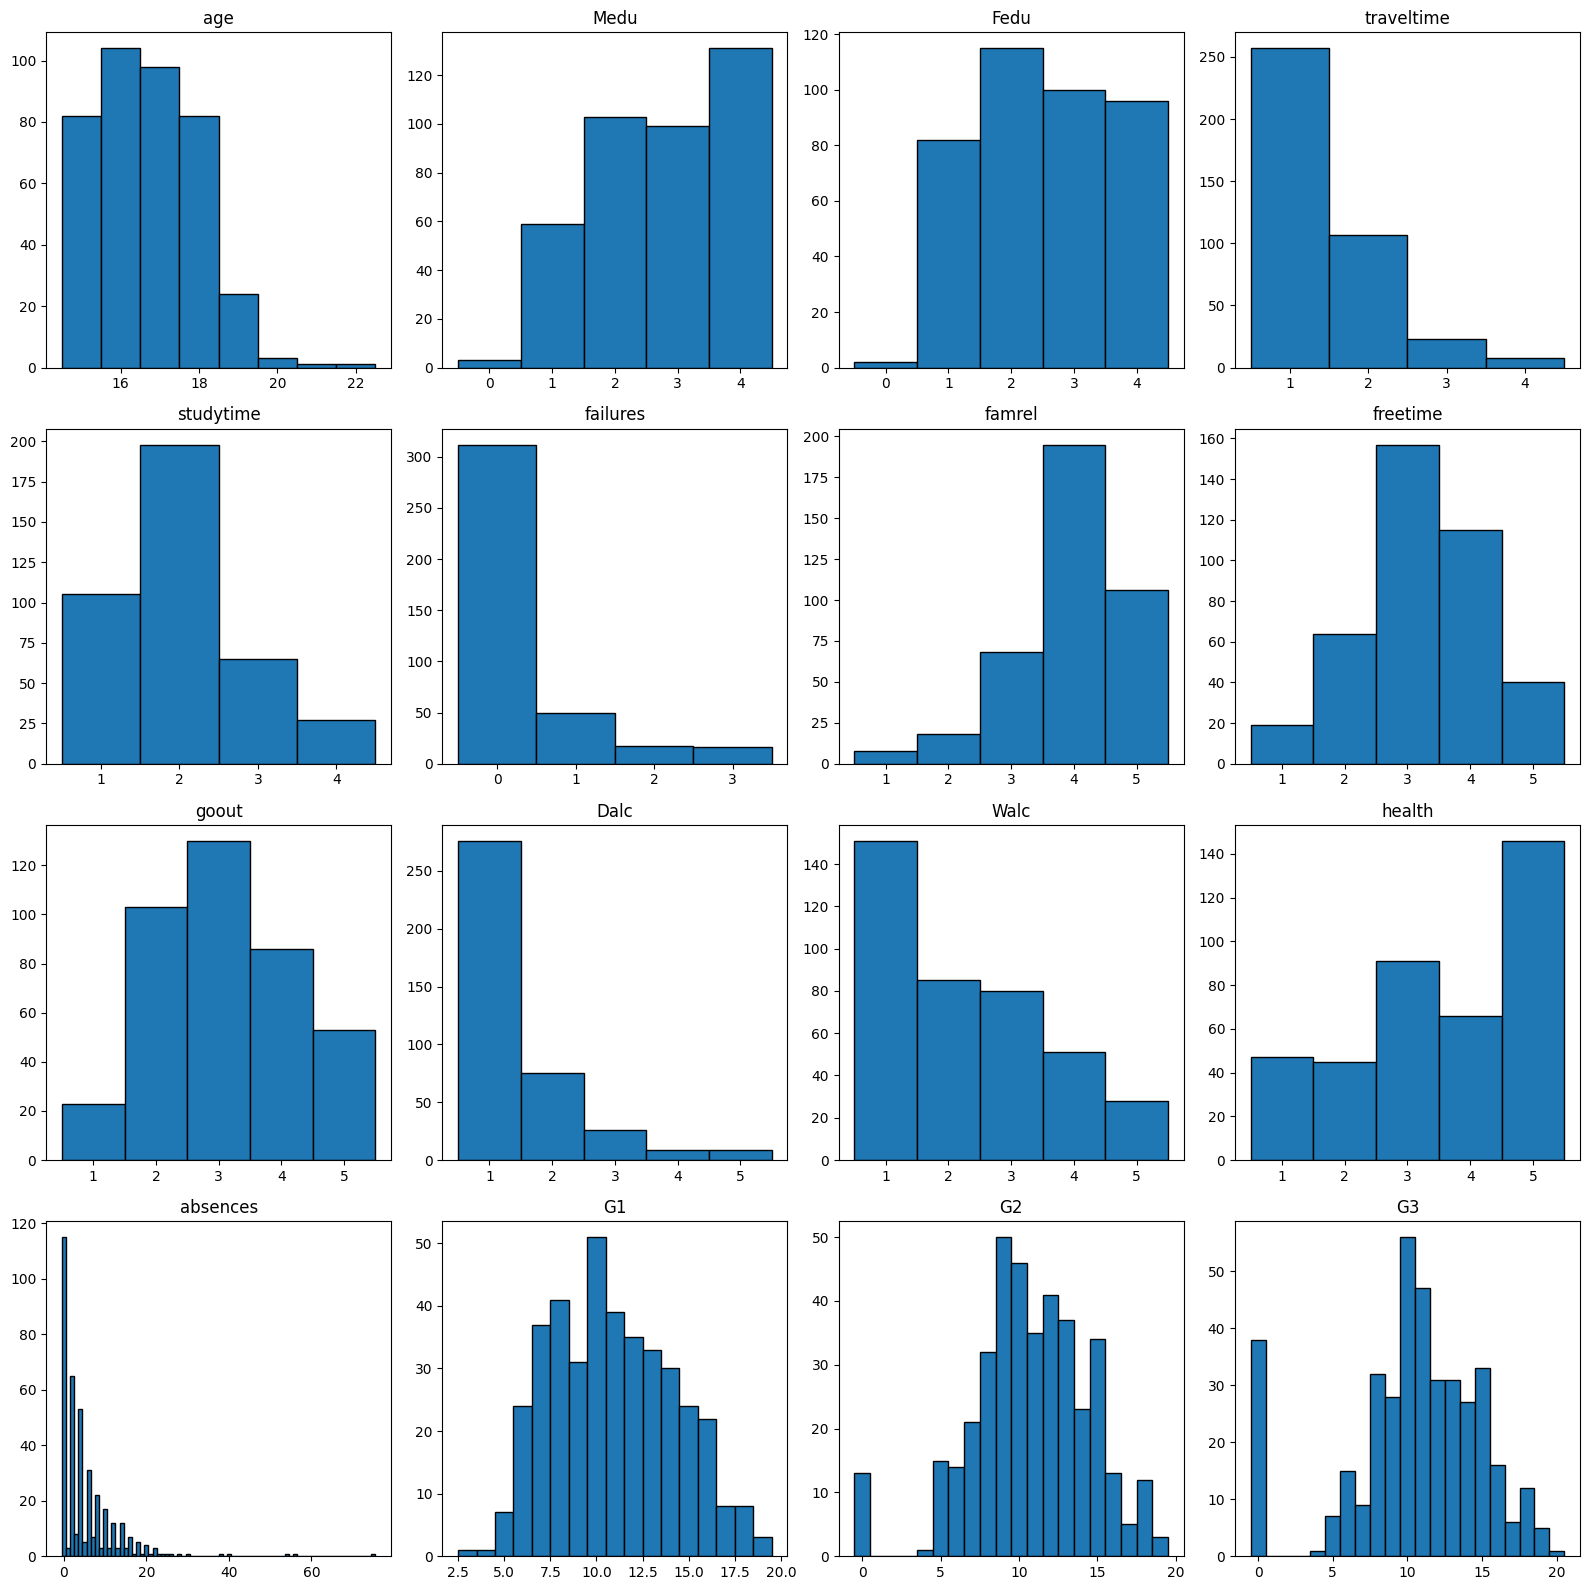

In [48]:
#######################  Visualización gráfica (histogramas) ################################

fig, ax = plt.subplots(4, 4, figsize=(16, 16)) #Grafo de 4x4

for i in range(len(dfMat.columns)):
    columna = dfMat.iloc[:, i]
    row = i // 4  #fila
    col = i % 4   #columna
    ax[row, col].hist(columna, bins=range(min(columna), max(columna) + 2), align='left', edgecolor="black")
    ax[row, col].set_title(dfMat.columns[i]) #Titulo = variable

plt.tight_layout()  # Espaciado
plt.show()

<Axes: >

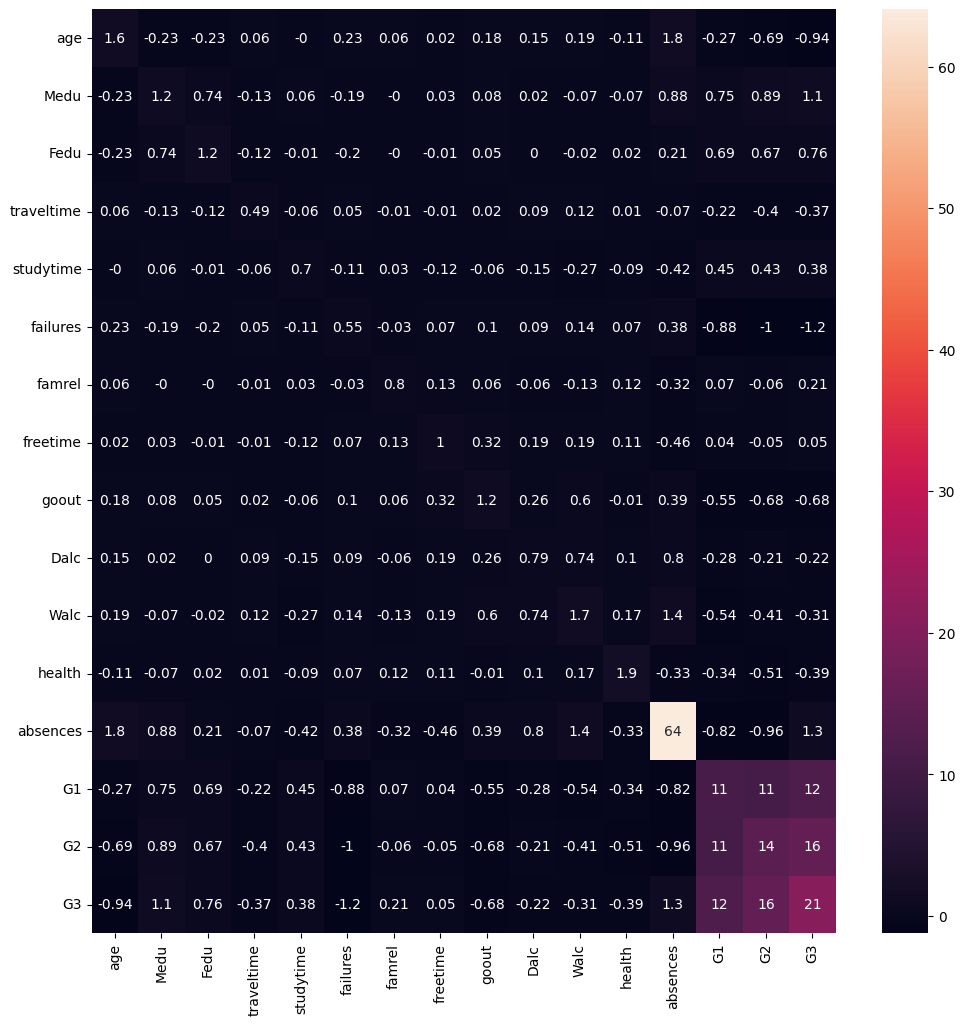

In [49]:
#Covarianza
mtxCov = dfMat.cov().round(2)

#Mostrar grafica covarianza
plt.figure(figsize=(12,12))
sns.heatmap(mtxCov,annot=True)

<Axes: >

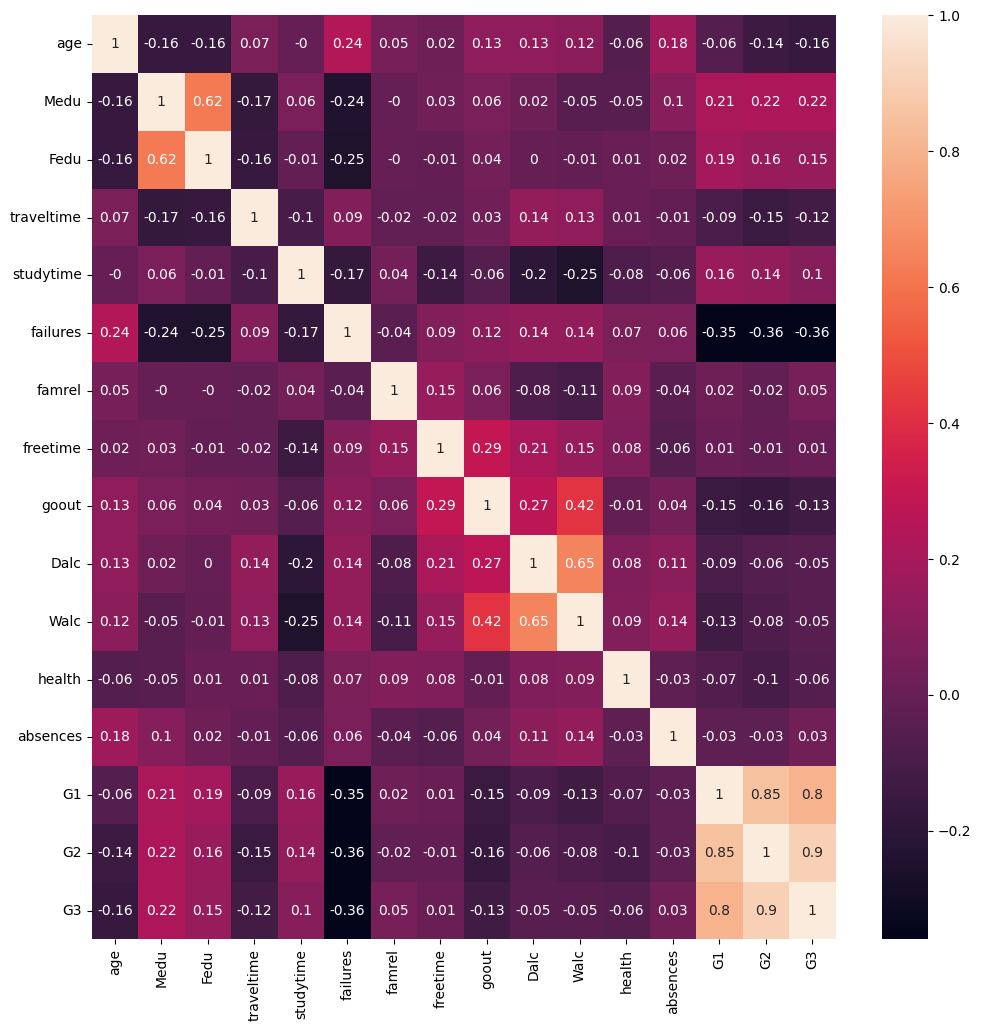

In [50]:
#Correlacion
mtxCorr = dfMat.corr().round(2)

#Mostrar grafica correlacion
plt.figure(figsize=(12,12))
sns.heatmap(mtxCorr,annot=True)

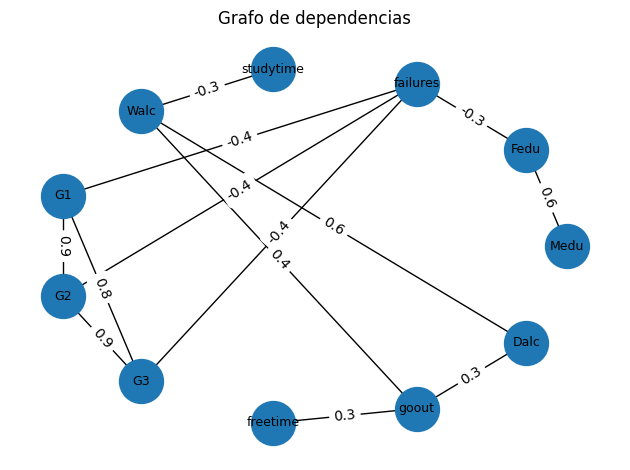

In [51]:
#Grafo con las dependencias más significativas
fig, ax = plt.subplots()
fnDepGraph(data=dfMat, axFn=ax)
ax.set_title("Grafo de dependencias")
plt.axis("off")
plt.tight_layout()
plt.show()

16


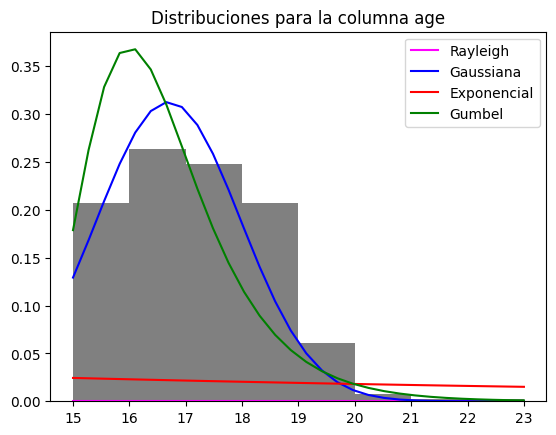

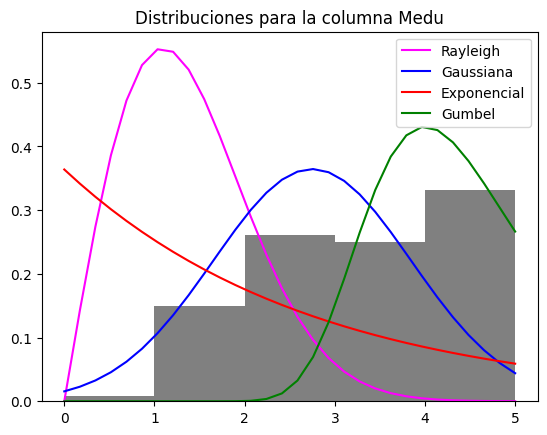

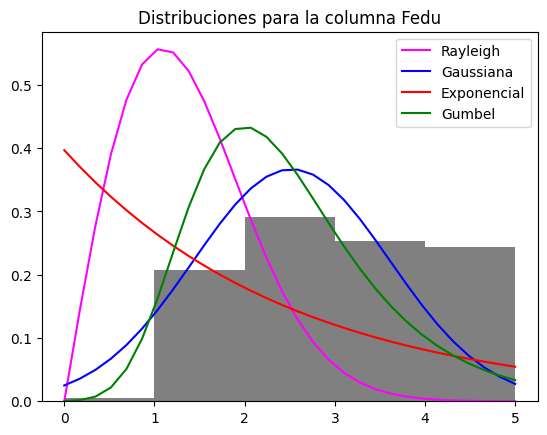

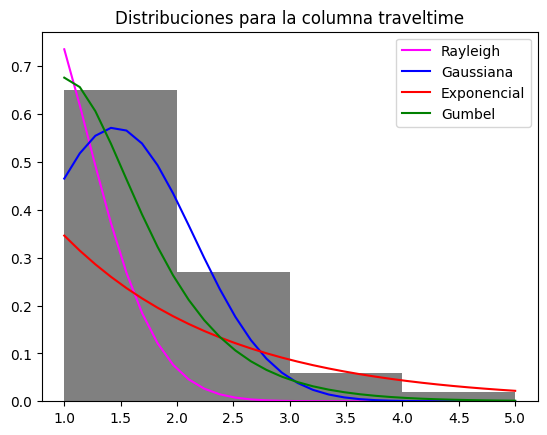

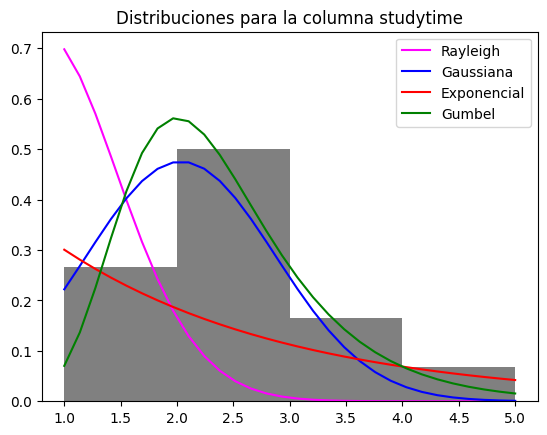

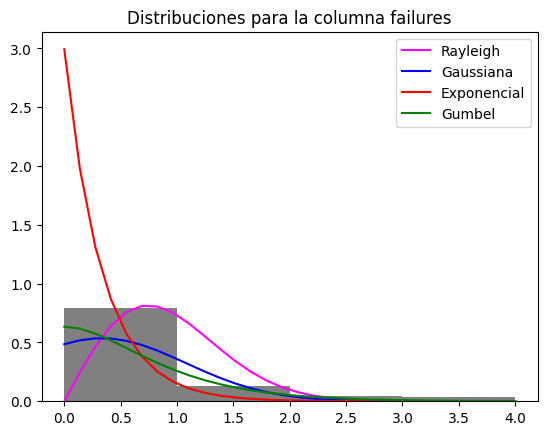

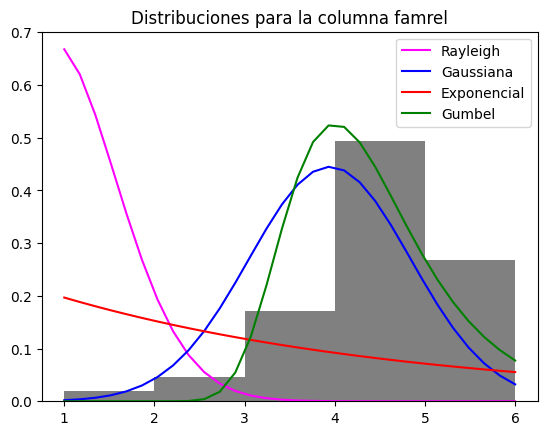

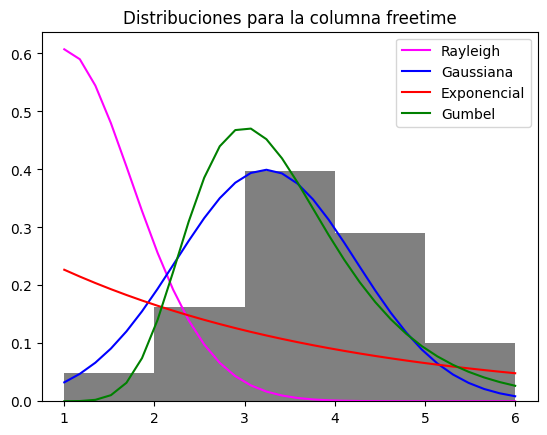

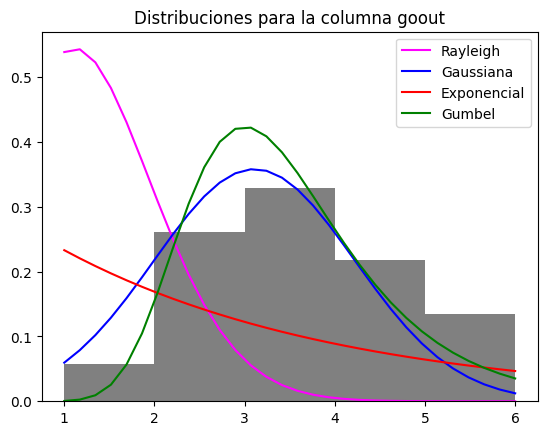

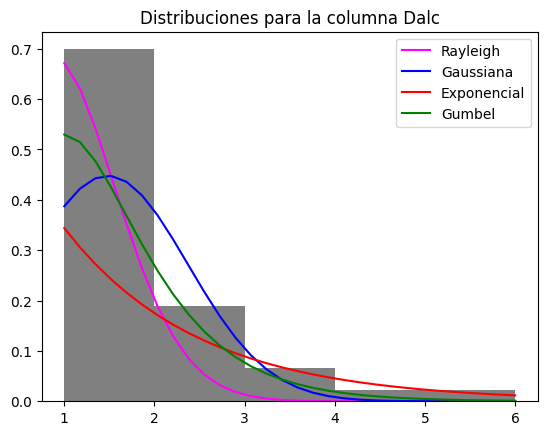

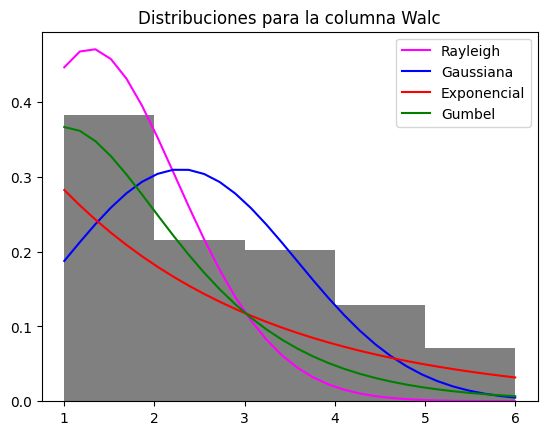

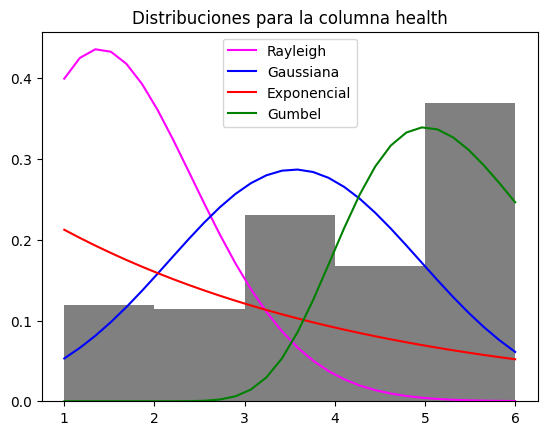

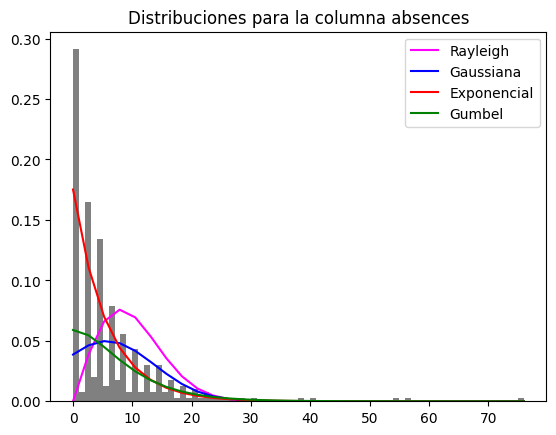

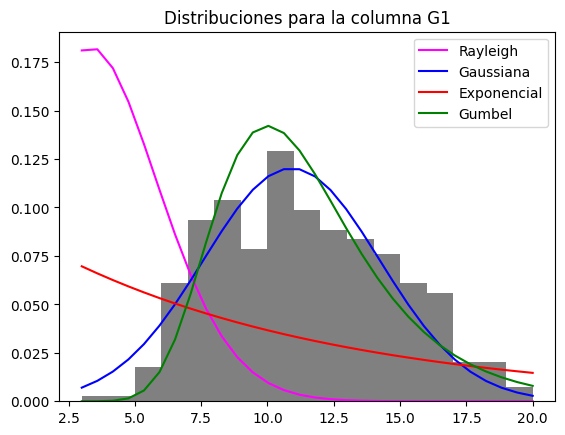

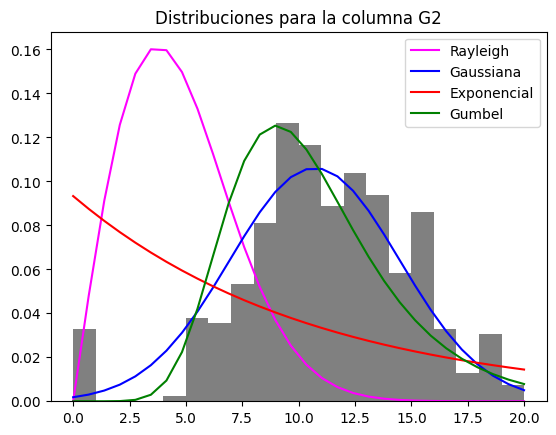

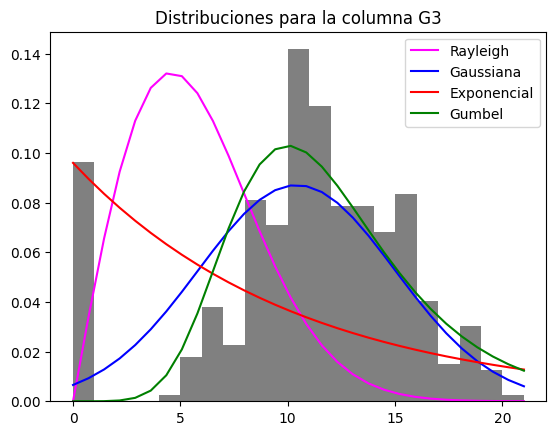

In [52]:
#######################  Distribución de probabilidad ################################
X = dfMat.iloc[:,:] #Todas 
print(len(X.columns))
#16 columnas, 4 distribuciones

for i in range(len(X.columns)):
    fig, ax = plt.subplots()
    
    bins = range(min(X.iloc[:,i]), max(X.iloc[:,i]) + 2) #+2 para que alcancen todo el grafo
    ax.hist(X.iloc[:,i], bins, density=True, color='grey')

    nsize= 30
    x_int = np.linspace(min(X.iloc[:,i]), max(X.iloc[:,i]) + 1,nsize)

    # distribucion Rayleigh 
    fr = fnRayleigh(x_int,X.iloc[:,i])
    ax.plot(x_int,fr, color="magenta", label="Rayleigh")

    # distribucion normal (Gaussiana)
    fg = fnGaussiana(x_int,X.iloc[:,i])
    ax.plot(x_int,fg, color="blue", label="Gaussiana")

    # distribucion exponencial 1P
    fe = fnExponencial(x_int,X.iloc[:,i])
    ax.plot(x_int,fe,color='red', label="Exponencial")

    # distribucion gumbel
    fgumbel = fnGumbel(x_int,X.iloc[:,i])
    ax.plot(x_int,fgumbel,color="green", label="Gumbel")

    # Agregar titulo al grafico
    ax.set_title(f"Distribuciones para la columna {X.columns[i]}")

    # Mostrar el grafico
    plt.legend()
    plt.show()

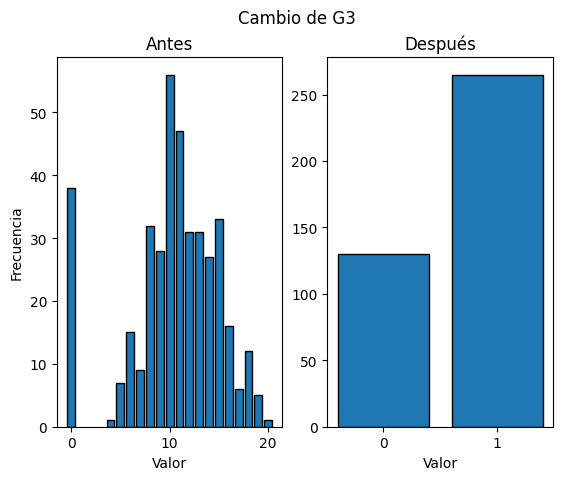

In [53]:
#Discretizar la salida (G3) 
G3Col = dfMat['G3'].apply(fnDisc)

# Gráfico de barras G3 (Antes vs Despues)
fig, ax = plt.subplots(1,2)

#Antes
frecuencias = dfMat['G3'].value_counts()
ax[0].bar(frecuencias.index, frecuencias.values, edgecolor='black')
ax[0].set_xticks(np.linspace(min(frecuencias.index), max(frecuencias.index), num=3))
ax[0].set_xlabel('Valor')
ax[0].set_ylabel('Frecuencia')
ax[0].set_title('Antes')

#Despues
frecuencias = G3Col.value_counts()
ax[1].bar(frecuencias.index, frecuencias.values, edgecolor='black')
ax[1].set_xticks(frecuencias.index)
ax[1].set_xlabel('Valor')
ax[1].set_title('Después')

fig.suptitle('Cambio de G3')
plt.show()


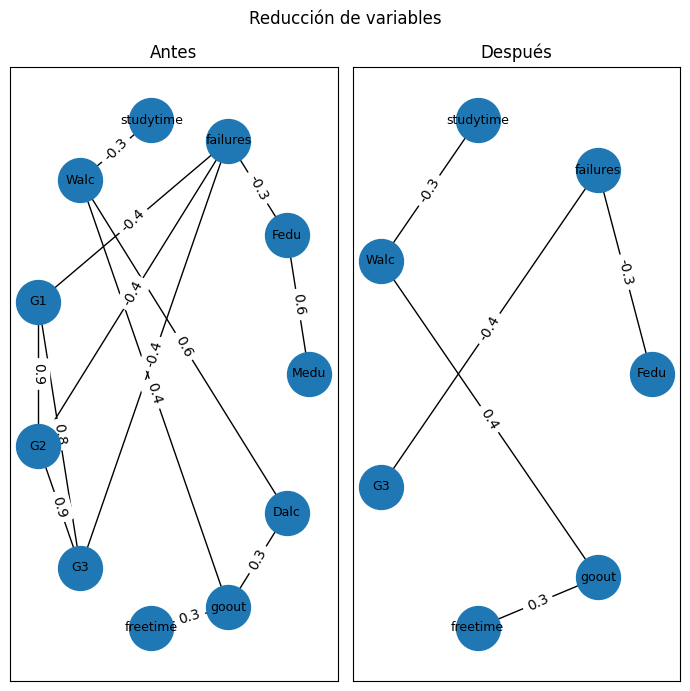

In [54]:
#Grafo de dependecias despues de descartar variables
dfNuevo = dfMat.loc[:, ~dfMat.columns.isin(['G1', 'G2', 'Medu', 'Dalc'])]

fig, ax = plt.subplots(1,2, figsize=(7,7))

#Grafo anterior
fnDepGraph(data=dfMat, axFn=ax[0])
ax[0].set_title('Antes')

#Grafo nuevo
fnDepGraph(data=dfNuevo, axFn=ax[1])
ax[1].set_title('Después')


fig.suptitle('Reducción de variables')
plt.tight_layout()
plt.show()